Creating a Word Cloud using Python

## Read in the data

In my example I wanted to create a word cloud for a website, so I picked my own blog for this exercise/example. The following code is used to read the website (a list of all packages used is given at the end).

In [1]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "https://www.rottentomatoes.com/m/eternals/reviews?type=verified_audience"
html = urlopen(url).read()
#print(html)

## Extract just the Text from the webpage

The Beautiful soup library has some useful functions for processing html. There are many alternative ways of doing this processing but this is the approached that I liked.

The first step is to convert the downloaded html into BeautifulSoup format. When you view this converted data you will notices how everything is nicely laid out.

The second step is to remove some of the scripts from the code.

In [3]:
soup = BeautifulSoup(html)
#print(soup)

In [4]:
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out
    
#print(soup)

## Extract plain text and remove whitespacing

The first line in the following extracts just the plain text and the remaining lines removes leading and trailing spaces, compacts multi-headlines and drops blank lines.

In [5]:
text = soup.get_text()
print(text)








Eternals - Movie Reviews











































































                            Home
                        



                            Top Box Office
                        



                            Tickets & Showtimes
                        



                            DVD & Streaming
                        




                                TV
                            




                            News
                        






















What's the Tomatometer®?
Critics

SIGN UP
                    
                    |
                    
                        LOG IN




















                       Cancel
                    



Movies / TV



Celebrity



No Results Found

View All









                                    Home
                                




                                    Movies
                                




                               

In [6]:
# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

#print(text)

## Remove stop words, tokenise and convert to lower case

As the heading says this code removes standard stop words for the English language, removes numbers and punctuation, tokenises the text into individual words, and then converts all words to lower case.

In [7]:
#download and print the stop words for the English language
from nltk.corpus import stopwords
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))
stop_words = stopwords.words('english')
#print(stop_words)

In [8]:
#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download('punkt')
words = word_tokenize(text)
print(len(words))
#print(words)

1689


In [9]:
# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(len(wordsFiltered))
#print(wordsFiltered)

1418


In [10]:
#some extra stop words are needed after examining the data and word cloud
#these are added
extra_stop_words = ['movies','eternals','movie','verifed', 'tv','rotten', 'tomatoes', 
                    'season', 'verified','review','reviews','view', 'rt','marvel', 'contains','certified',
                    'password','newsletter', 'critic','critics','next','prev','email']
stop_words.extend(extra_stop_words)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# remove stop words from tokenised data set
#filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(len(filtered_words))
print(filtered_words)

711
['home', 'top', 'box', 'office', 'tickets', 'showtimes', 'dvd', 'streaming', 'news', 'sign', 'log', 'cancel', 'celebrity', 'results', 'found', 'home', 'shows', 'new', 'podcast', 'news', 'account', 'sign', 'log', 'theaters', 'opening', 'week', 'top', 'box', 'office', 'coming', 'soon', 'theaters', 'weekend', 'earnings', 'fresh', 'dvd', 'streaming', 'vudu', 'netflix', 'streaming', 'itunes', 'amazon', 'amazon', 'prime', 'top', 'dvd', 'streaming', 'fresh', 'browse', 'top', 'trailers', 'fresh', 'picks', 'black', 'widow', 'fear', 'street', 'part', 'one', 'space', 'odyssey', 'shows', 'new', 'tonight', 'score', 'yet', 'emily', 'paris', 'score', 'yet', 'vigil', 'score', 'yet', 'dragons', 'nine', 'realms', 'score', 'yet', 'dynasty', 'popular', 'witcher', 'station', 'eleven', 'arcane', 'league', 'legends', 'hawkeye', 'wheel', 'time', 'yellowjackets', 'succession', 'like', 'landscapers', 'cowboy', 'bebop', 'top', 'shows', 'fresh', 'episodic', 'american', 'horror', 'stories', 'loki', 'star', 'wa

## Create the Word Cloud

Finally we can create a word cloud backed on the finalised data set of tokenised words. Here we use the WordCloud library to create the word cloud and then the matplotlib library to display the image.

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(filtered_words))

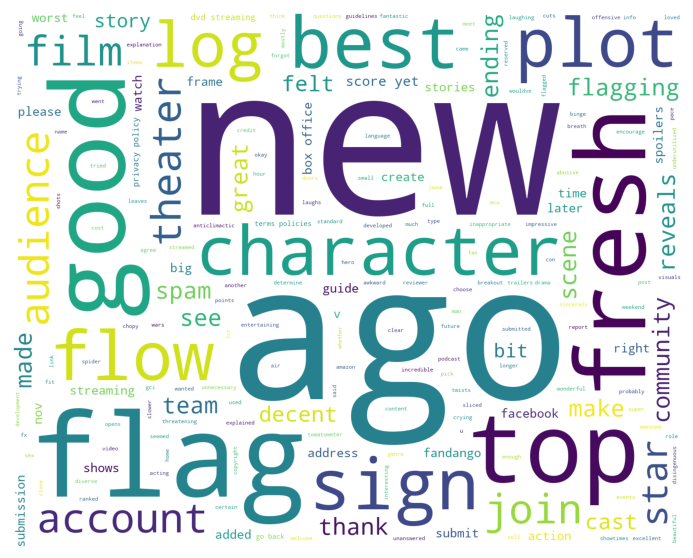

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
#wc.to_file("/wordcloud.png")

## Word Cloud based on frequency counts

Another alternative when using the WordCloud library is to generate a WordCloud based on the frequency counts. For this you need to build up a table containing two items. The first item is the distinct token and the second column contains the number of times that word/token appears in the text. The following code shows this code and the code to generate the word cloud based on this frequency count.

In [15]:
from collections import Counter

In [16]:
# count frequencies
cnt = Counter()
for word in filtered_words:
    cnt[word] += 1

#print(cnt)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate_from_frequencies(cnt)

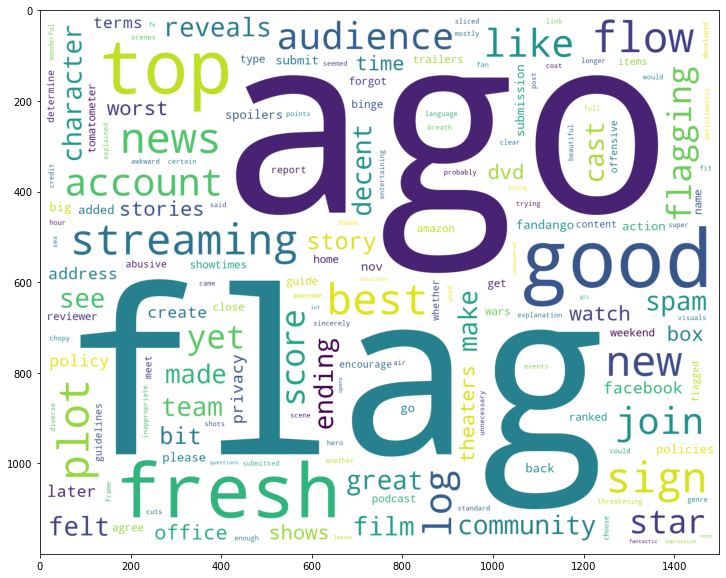

In [19]:
plt.figure(figsize=(20,10))
plt.imshow(wc)
#plt.axis("off")
plt.show()